
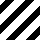
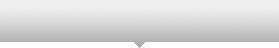
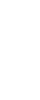
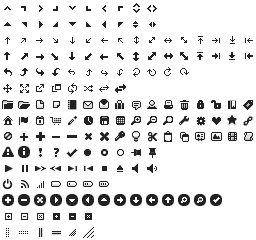
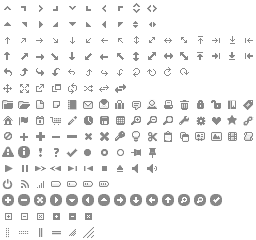
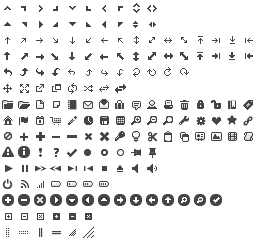
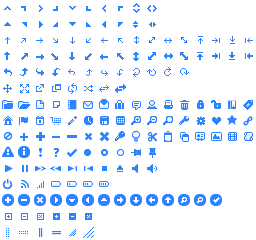
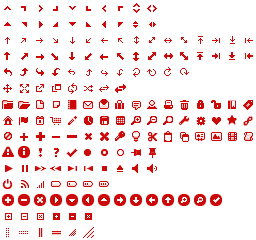
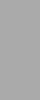
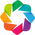
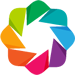
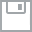
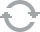
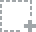
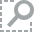
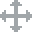
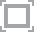
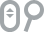

In [1]:
import yaml
import numpy as np

from scipy.interpolate import SmoothBivariateSpline

import bokeh.plotting as bkh
from bokeh.models import HoverTool

In [2]:
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

import descartes as des

In [3]:
import sys
sys.path.append("../")

from electronfactors.model.threshold import angle_gap, fit_give

In [4]:
bkh.output_notebook()

In [5]:
with open("output/AllInputs_guessed.yml", 'r') as inputFile:
    AllInputs_guessed = yaml.load(inputFile)

In [6]:
# Should have it at this stage so that it searches for all valid 
# energy / applicator / ssd combos and runs this function for each
# valid combo

energy = 12
applicator = 10
ssd = 100

relevantcoords = dict()

for i, key in enumerate(AllInputs_guessed):
    sameenergy = AllInputs_guessed[key]['energy'] == energy
    sameapplicator = AllInputs_guessed[key]['applicator'] == applicator
    samessd = AllInputs_guessed[key]['ssd'] == ssd
    
    if sameenergy and sameapplicator and samessd:
        relevantcoords[key] = AllInputs_guessed[key]

In [7]:
width = np.zeros(len(relevantcoords))
length = np.zeros(len(relevantcoords))
factor = np.zeros(len(relevantcoords))
label = [0] * len(relevantcoords)

for i, key in enumerate(relevantcoords):
    width[i] = relevantcoords[key]['width']
    length[i] = relevantcoords[key]['length']
    factor[i] = relevantcoords[key]['factor']
    label[i] = key

In [8]:
ratio = width/length
eqPonA = 2*( 3*(ratio+1) - np.sqrt( (3*ratio+1)*(ratio+3) ) ) / width

In [9]:
bivariateSpline = SmoothBivariateSpline(width,eqPonA,factor,kx=2,ky=2)

In [10]:
min_distance = 1.5

def circle_fit(radii):
    
    if radii >= min_distance:
        result = bivariateSpline.ev(radii*2, 2/radii)
        
    else:
        result = 0.
               
    return result

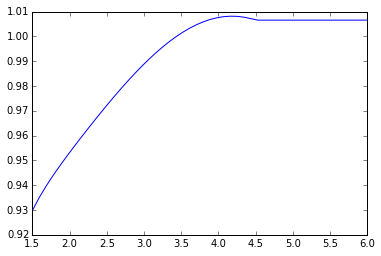

In [49]:
radii = np.linspace(1.5, 6)
y = np.array([circle_fit(radius) for radius in radii])
plt.plot(radii, y)

In [11]:
# radii = np.linspace(0,5)
# y = circle_fit(radii)

# plt.plot(radii, y)

In [12]:
# radii = np.linspace(np.min(width),5)
# y = circle_fit(radii)

# plt.plot(radii, y)

In [13]:
updatedGuess = dict()

In [21]:
def plot_equivalent_ellipse(eqEllipseObject):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    patch = des.PolygonPatch(eqEllipseObject.centredCutout, fc=np.random.uniform(size=3), alpha=0.3)
    ax.add_patch(patch)

    patch = des.PolygonPatch(eqEllipseObject.straightenedCutout, fc=np.random.uniform(size=3), alpha=0.3)
    ax.add_patch(patch)

    patch = des.PolygonPatch(eqEllipseObject.eqEllipse, fc=np.random.uniform(size=3), alpha=0.5)
    ax.add_patch(patch)

    plt.scatter(0,0)
    ax.axis("equal")
    
    plt.title(str(key))
    plt.show()

It would be worth rotating the ellipses to the cutout for visual reasons

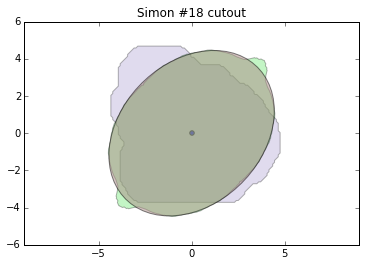

Simon #18 cutout -- complete


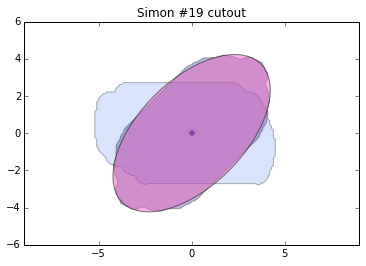

Simon #19 cutout -- complete


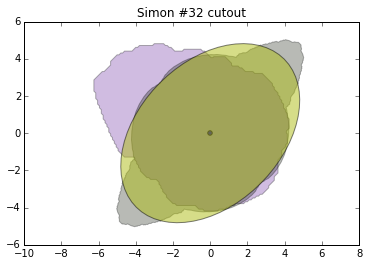

Simon #32 cutout -- complete


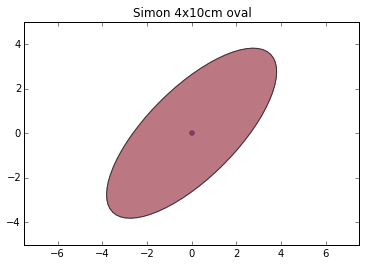

Simon 4x10cm oval -- complete


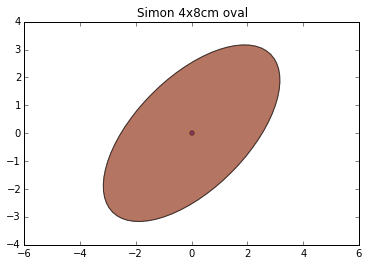

Simon 4x8cm oval -- complete


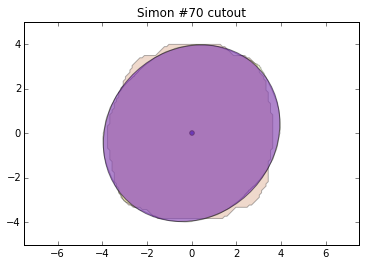

Simon #70 cutout -- complete


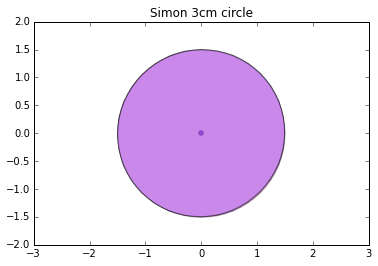

Simon 3cm circle -- complete


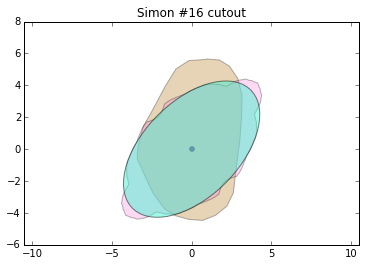

Simon #16 cutout -- complete


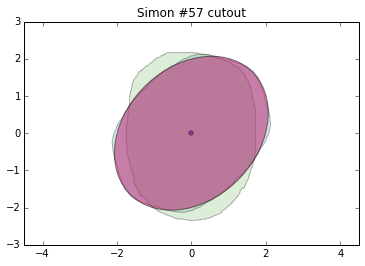

Simon #57 cutout -- complete


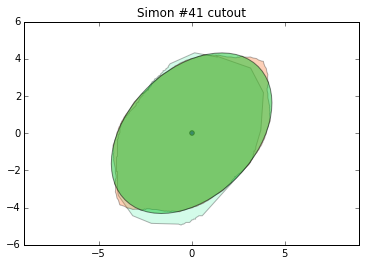

Simon #41 cutout -- complete


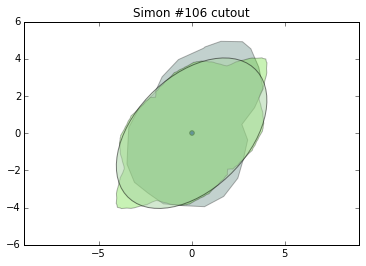

Simon #106 cutout -- complete


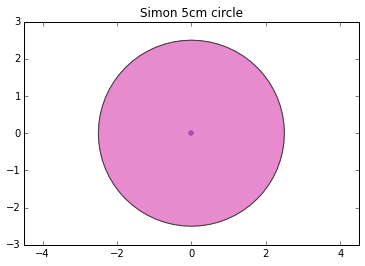

Simon 5cm circle -- complete


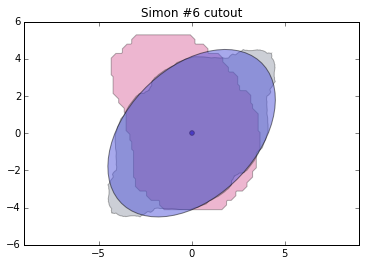

Simon #6 cutout -- complete


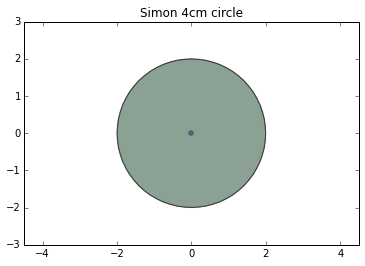

Simon 4cm circle -- complete


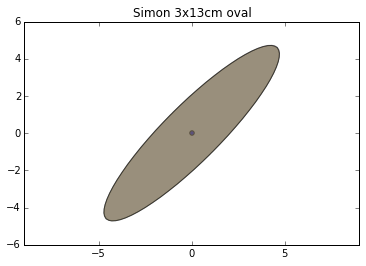

Simon 3x13cm oval -- complete


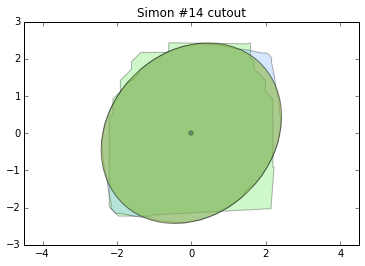

Simon #14 cutout -- complete


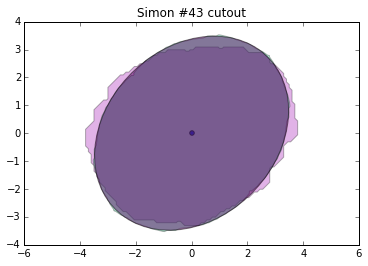

Simon #43 cutout -- complete


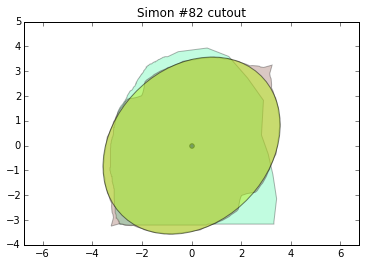

Simon #82 cutout -- complete


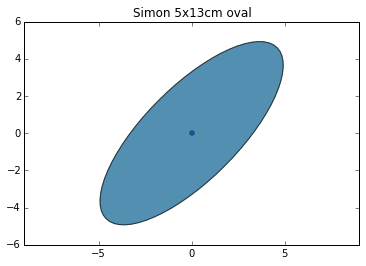

Simon 5x13cm oval -- complete


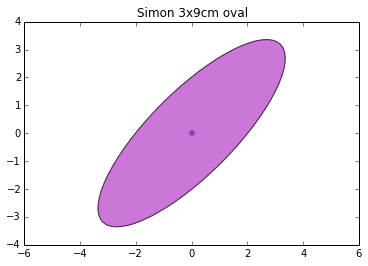

Simon 3x9cm oval -- complete


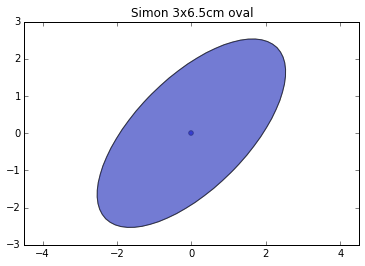

Simon 3x6.5cm oval -- complete


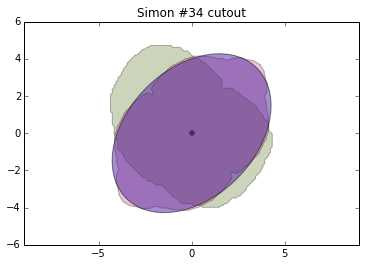

Simon #34 cutout -- complete


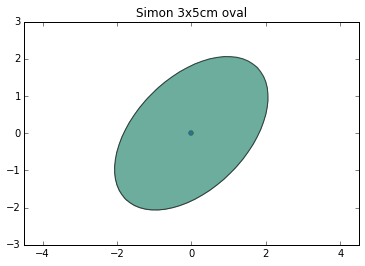

Simon 3x5cm oval -- complete


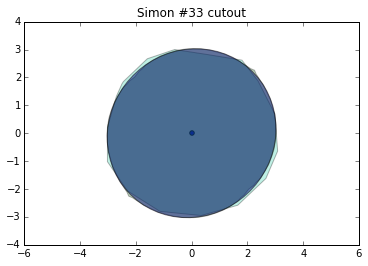

Simon #33 cutout -- complete


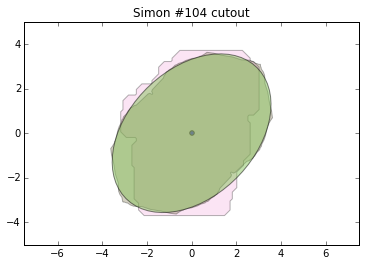

Simon #104 cutout -- complete


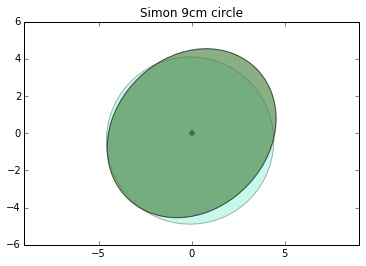

Simon 9cm circle -- complete


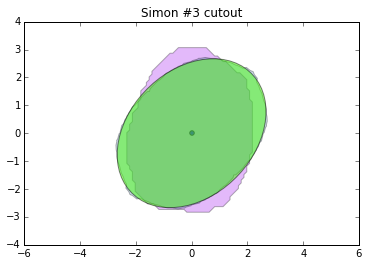

Simon #3 cutout -- complete


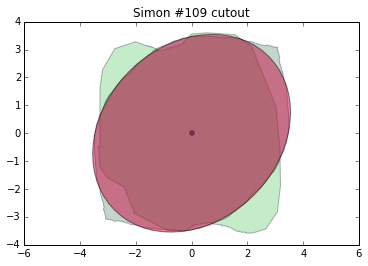

Simon #109 cutout -- complete


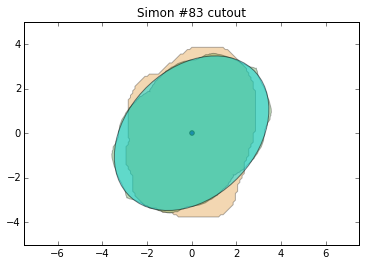

Simon #83 cutout -- complete


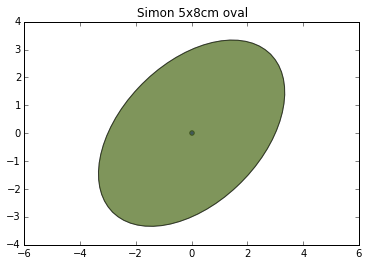

Simon 5x8cm oval -- complete


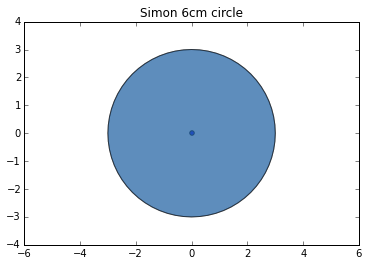

Simon 6cm circle -- complete


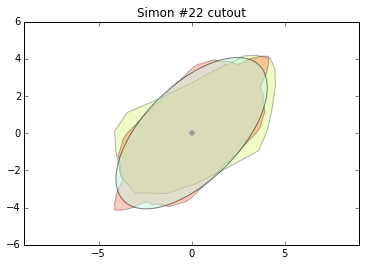

Simon #22 cutout -- complete


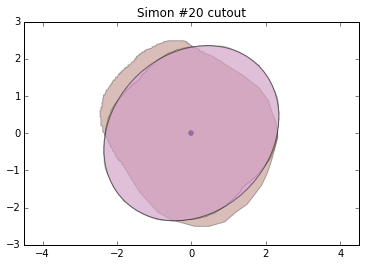

Simon #20 cutout -- complete


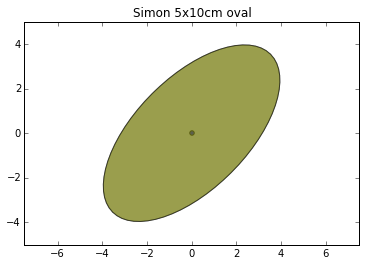

Simon 5x10cm oval -- complete


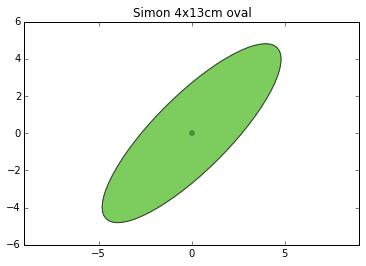

Simon 4x13cm oval -- complete


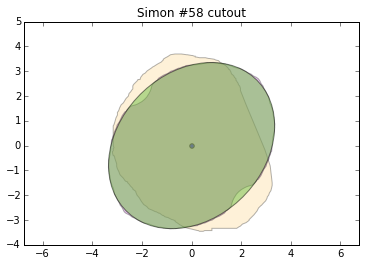

Simon #58 cutout -- complete


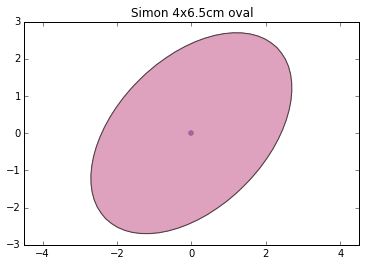

Simon 4x6.5cm oval -- complete


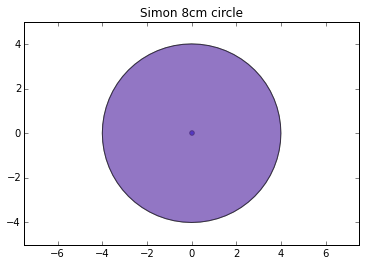

Simon 8cm circle -- complete


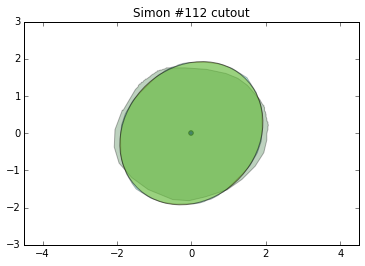

Simon #112 cutout -- complete


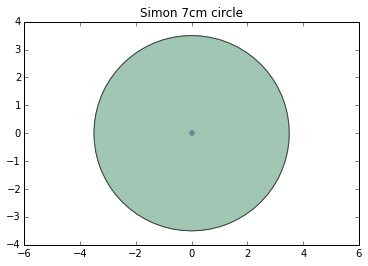

Simon 7cm circle -- complete


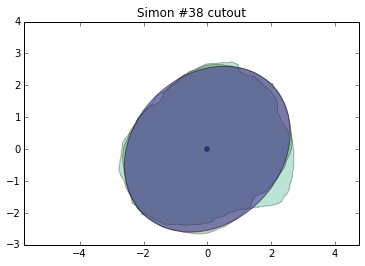

Simon #38 cutout -- complete


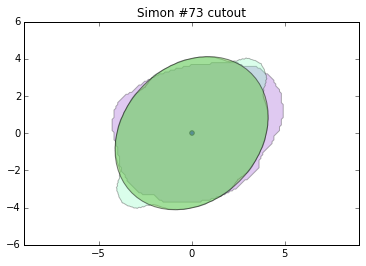

Simon #73 cutout -- complete


In [22]:
from electronfactors.ellipse.equivalent import EquivalentEllipse

equivalentEllipse = dict()

for i, key in enumerate(label):
    XCoords = relevantcoords[key]['XCoords']
    YCoords = relevantcoords[key]['YCoords']
    
    equivalentEllipse[key] = EquivalentEllipse(x=XCoords, y=YCoords, circle_fit=circle_fit, n=2, 
                                               min_distance=1.49)
    
    
    updatedGuess[key] = dict()
    width = equivalentEllipse[key].width
    length = equivalentEllipse[key].length
    
    updatedGuess[key]['width'] = width
    updatedGuess[key]['length'] = length
    
    plot_equivalent_ellipse(equivalentEllipse[key])
    
    print(str(key) + ":\n  Width: %0.2f\n  Length: %0.2f\n" % (width, length))

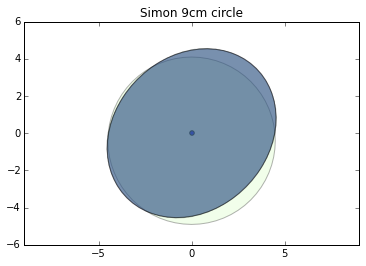

Simon 9cm circle:
  Width: 8.23
  Length: 9.85



In [46]:
# This is as a result of the "dip" in the circle_fit. It results in a point of maximum dose
# that claims to be off centre. It is likely not the case, but worth doing a profile to see
# if this is actually not nonsense. 

key = 'Simon 9cm circle'

XCoords = relevantcoords[key]['XCoords']
YCoords = relevantcoords[key]['YCoords']

equivalentEllipse[key] = EquivalentEllipse(x=XCoords, y=YCoords, circle_fit=circle_fit, n=2, 
                                           min_distance=1.49)


updatedGuess[key] = dict()
width = equivalentEllipse[key].width
length = equivalentEllipse[key].length

updatedGuess[key]['width'] = width
updatedGuess[key]['length'] = length

plot_equivalent_ellipse(equivalentEllipse[key])

print(str(key) + ":\n  Width: %0.2f\n  Length: %0.2f\n" % (width, length))

In [23]:
key

'Simon #73 cutout'

In [24]:
# for i, key in enumerate(label):
    
    
#     fig = plt.figure()
#     ax = fig.add_subplot(111)

#     patch = des.PolygonPatch(equivalentEllipse[key].centredCutout, fc=np.random.uniform(size=3), alpha=0.3)
#     ax.add_patch(patch)

#     patch = des.PolygonPatch(equivalentEllipse[key].straightenedCutout, fc=np.random.uniform(size=3), alpha=0.3)
#     ax.add_patch(patch)

#     patch = des.PolygonPatch(equivalentEllipse[key].eqEllipse, fc=np.random.uniform(size=3), alpha=0.5)
#     ax.add_patch(patch)

#     plt.scatter(0,0)

# #     ax.set_xlim([-equivalentEllipse[key]._Straightened.maxRadii, equivalentEllipse[key]._Straightened.maxRadii])
# #     ax.set_ylim([-equivalentEllipse[key]._Straightened.maxRadii, equivalentEllipse[key]._Straightened.maxRadii])
#     ax.axis("equal")
    
#     plt.title(str(key))
#     plt.show()

In [25]:
test = equivalentEllipse[key]

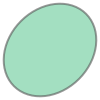

In [26]:
test.eqEllipse

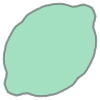

In [27]:
test.straightenedCutout

In [28]:
width_diff = np.zeros(len(width))
length_diff = width_diff.copy()

for i, key in enumerate(label):
    
    width_diff[i] = updatedGuess[key]['width'] - relevantcoords[key]['width']
    length_diff[i] = updatedGuess[key]['length'] - relevantcoords[key]['length']

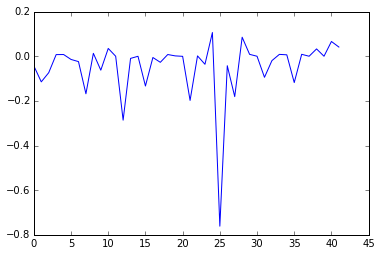

In [29]:

plt.plot(width_diff)

In [44]:
ref = np.argmax(np.abs(width_diff))
label[ref]

'Simon 9cm circle'

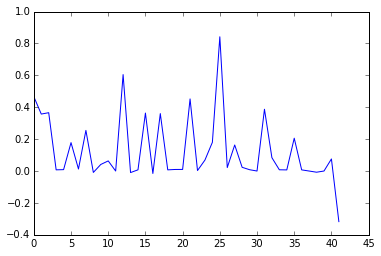

In [30]:
plt.plot(length_diff)

In [31]:
updatedGuess[key]['width']

7.291211768526817

In [32]:
relevantcoords[key]['width']

7.25

In [33]:
updatedGuess[key]['width']

7.291211768526817

In [34]:
width

array([ 7.64,  5.8 ,  7.73,  4.  ,  4.  ,  7.46,  3.  ,  6.18,  3.54,
        6.88,  6.04,  5.  ,  7.25,  4.  ,  3.  ,  4.51,  6.1 ,  6.28,
        5.  ,  3.  ,  3.  ,  7.1 ,  3.  ,  5.93,  5.58,  9.  ,  4.54,
        6.48,  5.68,  5.  ,  6.  ,  5.22,  4.27,  5.  ,  4.  ,  5.97,
        4.  ,  8.  ,  3.51,  7.  ,  4.57,  7.25])

In [35]:
fig = bkh.figure(title="Factor with width", 
             tools="resize, box_zoom, reset, hover",
             plot_height=400, plot_width=900)

source = bkh.ColumnDataSource(
    data=dict(
        label=label,
        width=width,
        length=length,
        factor=factor
    )
)

# fig.line(width, factor, color="blue", line_width=3, alpha=0.3)
fig.circle(width, factor, color="blue", size=12, alpha=0.5, source=source)

xa, ya = fig.axis
xa.axis_label = 'Width (cm)'
ya.axis_label = 'Factor'

hover = fig.select(dict(type=HoverTool))
hover.tooltips = [
    ("Label", "@label"),
    ("Width", "@width"),
    ("Length", "@length"),
    ("Factor", "@factor"),
    (" ", " ")
]

bkh.show(fig)

In [36]:
bivariateSpline = SmoothBivariateSpline(width,eqPonA,factor,kx=2,ky=2)

In [37]:
minimum_dimension = np.floor(np.min(width)*10)/10
maximum_dimension = np.ceil(np.max(length)*10)/10 + 0.1

x_vec = np.arange(minimum_dimension, maximum_dimension, 0.1)
y_vec = x_vec.copy()

xx_mesh, yy_mesh = np.meshgrid(x_vec, y_vec)

mesh_width = xx_mesh.copy()
mesh_width[xx_mesh > yy_mesh] = yy_mesh[xx_mesh > yy_mesh]

mesh_length = xx_mesh.copy()
mesh_length[yy_mesh > xx_mesh] = yy_mesh[yy_mesh > xx_mesh]

mesh_ratio = mesh_width / mesh_length

mesh_eqPonA = 2*( 3*(mesh_ratio+1) - np.sqrt( (3*mesh_ratio+1)*(mesh_ratio+3) ) ) / mesh_width

mesh_factor = bivariateSpline.ev(mesh_width, mesh_eqPonA)
give = fit_give(mesh_width, mesh_eqPonA, width, eqPonA, factor, kx=2, ky=2)
gap = angle_gap(mesh_width, mesh_eqPonA, width, eqPonA, 1, 1)

outOfTolerance = (give > 0.5) | (gap > 180)

mesh_factor[outOfTolerance] = np.nan
    
mesh_factor = np.floor(mesh_factor*1e4)/1e4

In [38]:
x_list = []
y_list = []
factor_list = []
width_list = []
length_list = []
eqPonA_list = []

for i, x in enumerate(x_vec):
    for j, y in enumerate(y_vec):        
        if not np.isnan(mesh_factor[i,j]):
            x_list.append(x)
            y_list.append(y)
            width_list.append(mesh_width[i,j])
            length_list.append(mesh_length[i,j])
            eqPonA_list.append(mesh_eqPonA[i,j])
            factor_list.append(round(mesh_factor[i,j],4))

sourceHeatmap = bkh.ColumnDataSource(
    data=dict(x=x_list, y=y_list, color=factor_list, 
              factor=factor_list, width=width_list, 
              length=length_list, eqPonA=eqPonA_list)
)

sourcePlotsNorm = bkh.ColumnDataSource(
    data=dict(width=width, length=length, factor=factor, eqPonA=eqPonA)
)

sourcePlotsMirr = bkh.ColumnDataSource(
    data=dict(width=width, length=length, factor=factor, eqPonA=eqPonA)
)

In [39]:
# Still need colour map

p = bkh.figure(tools="hover", plot_width=800, plot_height=800)

p.rect('x', 'y', 0.1, 0.1, source=sourceHeatmap, line_color=None, alpha=0.5)
p.circle("width", "length", color="green", size=12, alpha=0.5, source=sourcePlotsNorm)
p.circle("length", "width", color="orange", size=12, alpha=0.5, source=sourcePlotsMirr)

hover = p.select(dict(type=HoverTool))
hover.tooltips = [
    ('Width', '@width'),
    ('Length', '@length'),
    ('eqPonA', '@eqPonA'),
    ('Factor', '@factor')    
]

bkh.show(p)